In [73]:
import math

In [92]:
from PIL import Image, ImageFilter, ImageOps
import numpy as np
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
# load in image
i = '071318.jpg'
img = Image.open(i)

In [76]:
# resize and take a look
w,h = img.size
img = img.resize((w//3,h//3))

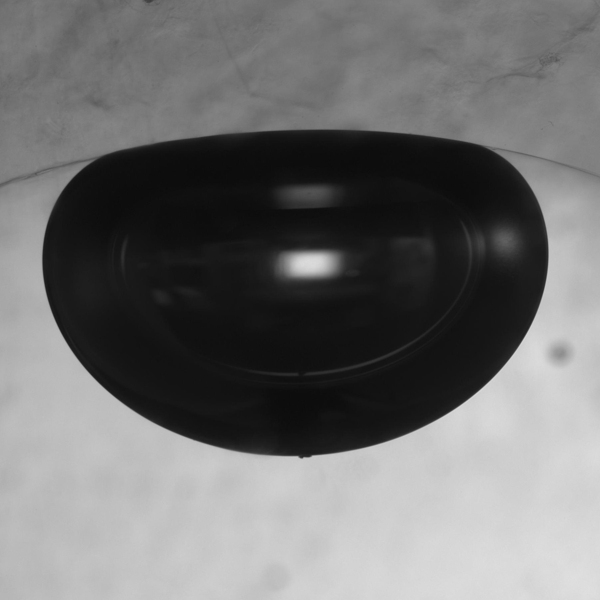

In [77]:
grey = np.array(ImageOps.grayscale(img))
img

In [78]:
def create_blur_kernel(sigma, size):
    kernel = np.zeros(size)
    size = int(size[0])
    mu = size//2
    
    for i in range(size):
        for j in range(size):
            kernel[i, j] = np.exp(-(1/2*(sigma**2)) * ((i-mu)**2 + (j-mu)**2)) / (2*np.pi*sigma**2)
            
    # normalize so contents of kernel sum to 1
    kernel = kernel/np.sum(kernel)
    return kernel

In [137]:
kernel = create_blur_kernel(1, (5,5))
kernel

array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]])

In [ ]:
def size_img():
    pass

In [97]:
def plot_image(img: np.array):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray');
    
def plot_two_images(img1: np.array, img2: np.array):
    _, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray');

In [72]:
def apply_convolution(img: np.array, kernel: np.array) -> np.array:
    # Assuming a rectangular image
#     tgt_size = calculate_target_size(
#         img_size=img.shape[0],
#         kernel_size=kernel.shape[0]
#     )
    tgt_size = 596
    # To simplify things
    k = kernel.shape[0]
    
    # 2D array of zeros
    convolved_img = np.zeros(shape=(tgt_size, tgt_size))
    
    # Iterate over the rows
    for i in range(tgt_size):
        # Iterate over the columns
        for j in range(tgt_size):
            # img[i, j] = individual pixel value
            # Get the current matrix
            mat = img[i:i+k, j:j+k]
            
            # Apply the convolution - element-wise multiplication and summation of the result
            # Store the result to i-th row and j-th column of our convolved_img array
            convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
            
    return convolved_img

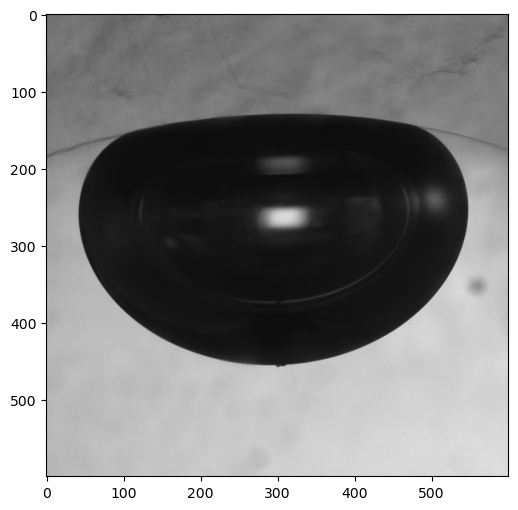

In [98]:
plot_image(img)

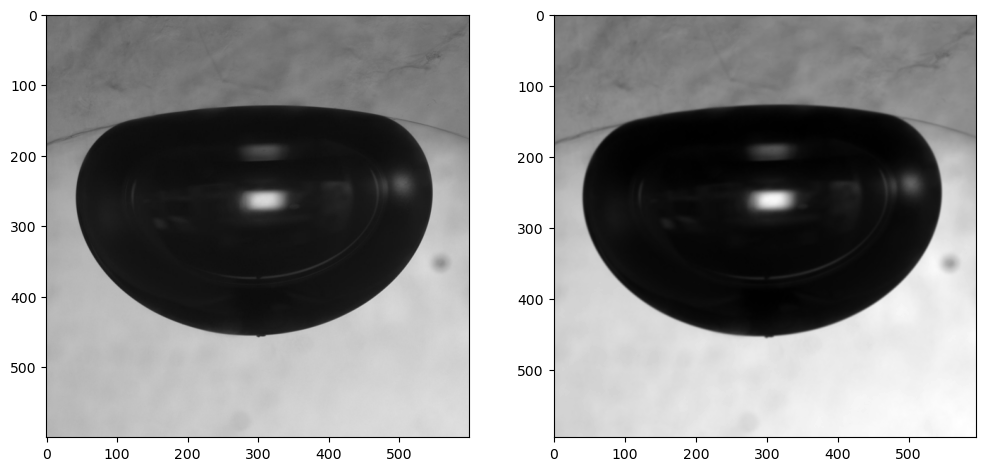

In [138]:
conv = apply_convolution(grey, kernel)
plot_two_images(img,conv)

In [144]:
conv[0].size

596

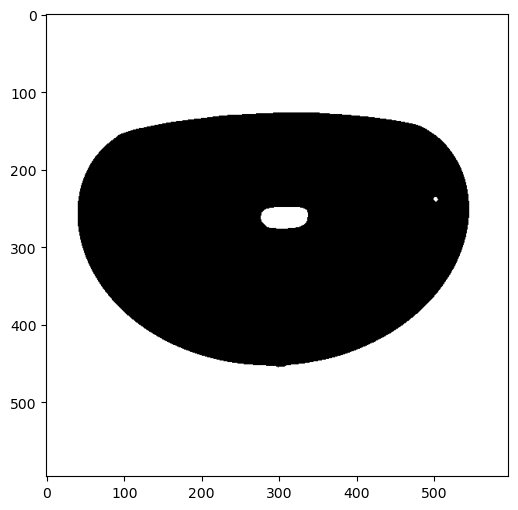

In [142]:
new = np.where(conv<=90, 0,255)
plot_image(new)